# _*TALLER 1 CORTE 2*_ (Clustering con K-Means Y AED)
## _Integrantes_
- Diego Olmedo
- Nicolás Wilches
- Mariana Chacon
- Juan Mateus

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score

url = "https://raw.githubusercontent.com/juanpablo130502/TallerDatasetTitanic_BI/refs/heads/main/Data/taller_bi_05032025.csv"
df = pd.read_csv(url, sep=';')
print("Información del DataFrame:")
print(df.info())
df.head()

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   edad       30000 non-null  int64 
 1   ingresos   30000 non-null  int64 
 2   genero     30000 non-null  object
 3   ciudad     30000 non-null  object
 4   educacion  30000 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.1+ MB
None


,edad,ingresos,genero,ciudad,educacion
0,56,39464619,Femenino,BARRANQUILLA,Postgrado
1,69,47607384,Masculino,CALI,Secundaria
2,46,61407709,Masculino,CARTAGENA,Secundaria
3,32,33712947,Femenino,SANTA MARTA,Secundaria
4,60,62728216,Masculino,MANIZALES,Postgrado


## Analisis Exploratorio de Datos (AED)

In [46]:
df.dropna(inplace=True)

label_encoders = {}
for col in ['genero', 'ciudad', 'educacion']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [47]:
df.describe()

,edad,ingresos,genero,ciudad,educacion
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,43.481733,5.039458e+07,0.502033,4.491833,0.997367
std,14.993986,2.866390e+07,0.500004,2.869612,0.818158
min,18.000000,1.002639e+06,0.000000,0.000000,0.000000
25%,31.000000,2.564283e+07,0.000000,2.000000,0.000000
50%,43.000000,5.020623e+07,1.000000,4.000000,1.000000
75%,56.000000,7.521984e+07,1.000000,7.000000,2.000000
max,69.000000,9.999863e+07,1.000000,9.000000,2.000000


In [ ]:
df = pd.read_csv(url, sep=';')

print("Valores nulos en cada columna:\n", df.isnull().sum())

mappings = {
    "ciudad": {'BARRANQUILLA': 0, 'CALI': 1, 'CARTAGENA': 2, 'SANTA MARTA': 3, 
               'MANIZALES': 4, 'BUCARAMANGA': 5, 'BOGOTA': 6, 'PEREIRA': 7, 
               'CUCUTA': 8, 'MEDELLIN': 9},
    "genero": {"Masculino": 1, "Femenino": 0},
    "educacion": {"Secundaria": 0, "Pregrado": 1, "Postgrado": 2}
}

for col, mapping in mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)

display(df)

Valores nulos en cada columna:
 edad         0
ingresos     0
genero       0
ciudad       0
educacion    0
dtype: int64


,edad,ingresos,genero,ciudad,educacion
0,56,39464619,0,0,2
1,69,47607384,1,1,0
2,46,61407709,1,2,0
3,32,33712947,0,3,0
4,60,62728216,1,4,2
...,...,...,...,...,...
29995,69,39342272,1,3,2
29996,45,53235383,1,2,0
29997,46,11669187,0,3,2
29998,25,57434794,0,5,1


In [6]:
columnas = ['edad', 'ingresos']

for columna in columnas:
    df[columna] = pd.to_numeric(df[columna], errors='coerce')

    media = df[columna].mean()
    mediana = df[columna].median()
    moda = df[columna].mode().iloc[0] if not df[columna].mode().empty else None 

    print(f'Medidas para la columna {columna}:')
    print(f'Media: {media}')
    print(f'Mediana: {mediana}')
    print(f'Moda: {moda}')
    print('-' * 40)

Medidas para la columna edad:
Media: 43.48173333333333
Mediana: 43.0
Moda: 34
----------------------------------------
Medidas para la columna ingresos:
Media: 50394580.16696667
Mediana: 50206226.5
Moda: 6673447
----------------------------------------


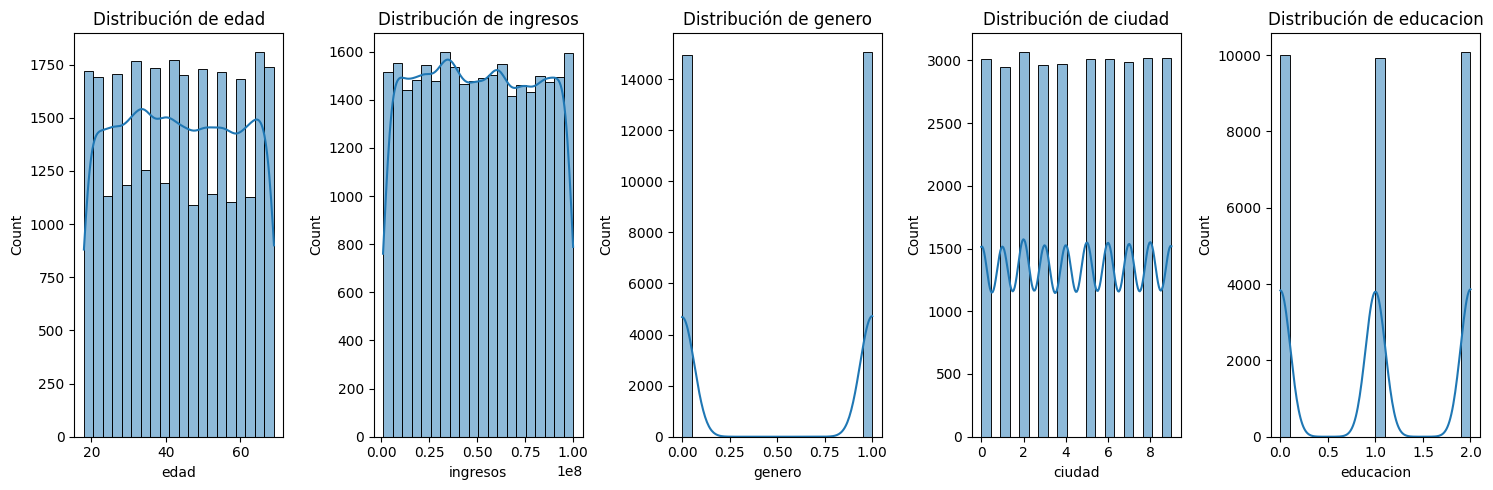

In [52]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(df.columns):
    plt.subplot(1, 5, i+1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

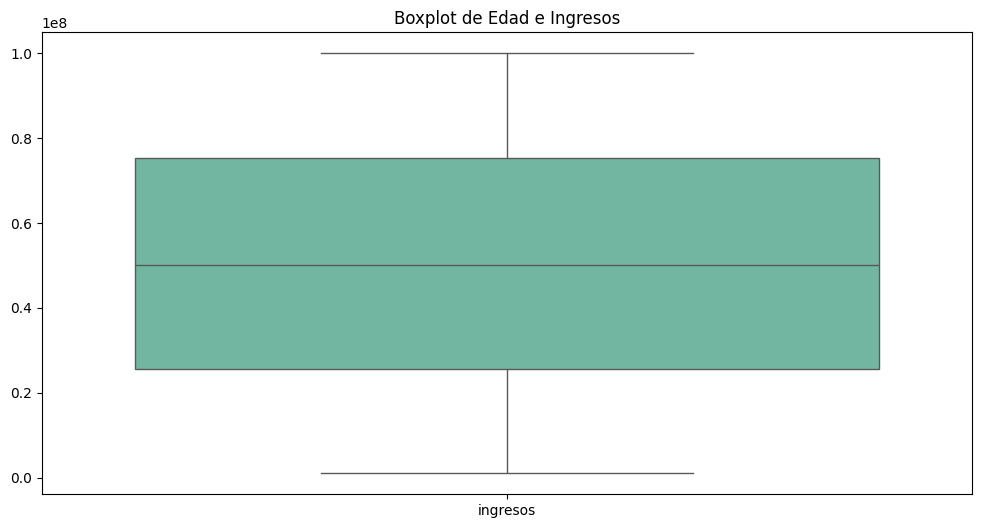

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['ingresos']], palette="Set2")
plt.title("Boxplot de Edad e Ingresos")
plt.show()


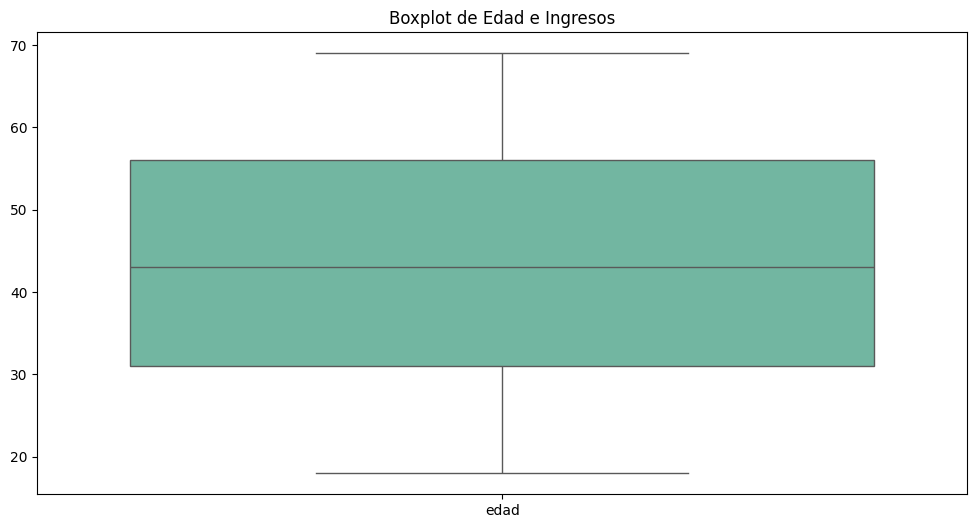

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['edad']], palette="Set2")
plt.title("Boxplot de Edad e Ingresos")
plt.show()


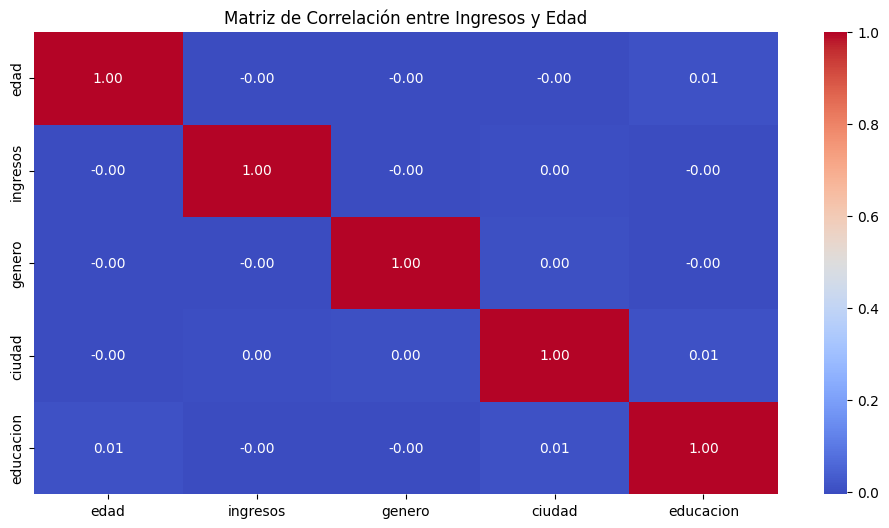

In [55]:
correlacion = df[['edad',	'ingresos',	'genero',	'ciudad',	'educacion' ]].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlación entre Ingresos y Edad')
plt.show()

## Aplicacion de K-means

In [79]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['edad', 'ingresos']])

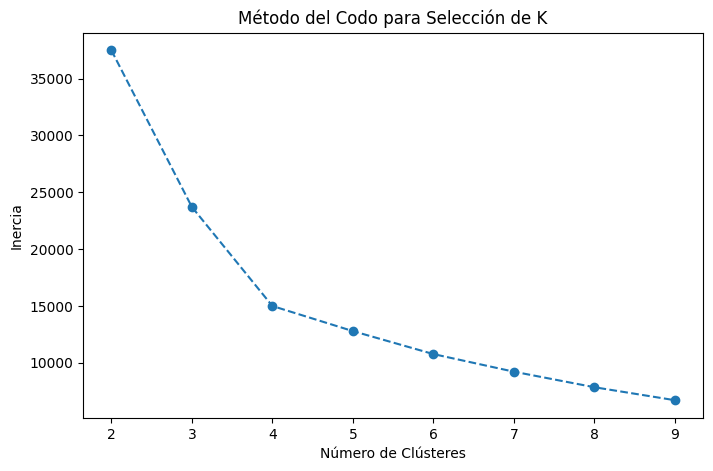

In [80]:
inertia = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.title('Método del Codo para Selección de K')
plt.show()

In [81]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    print(f'K={k}, Silhouette Score={score:.4f}')

K=2, Silhouette Score=0.3538
K=3, Silhouette Score=0.3779
K=4, Silhouette Score=0.4074
K=5, Silhouette Score=0.3786
K=6, Silhouette Score=0.3761
K=7, Silhouette Score=0.3519
K=8, Silhouette Score=0.3623
K=9, Silhouette Score=0.3610


In [82]:
k = 4  
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)
df.head()

,edad,ingresos,genero,ciudad,educacion,Cluster
0,56,39464619,0,0,2,2
1,69,47607384,1,1,0,2
2,46,61407709,1,2,0,0
3,32,33712947,0,3,0,1
4,60,62728216,1,4,2,0


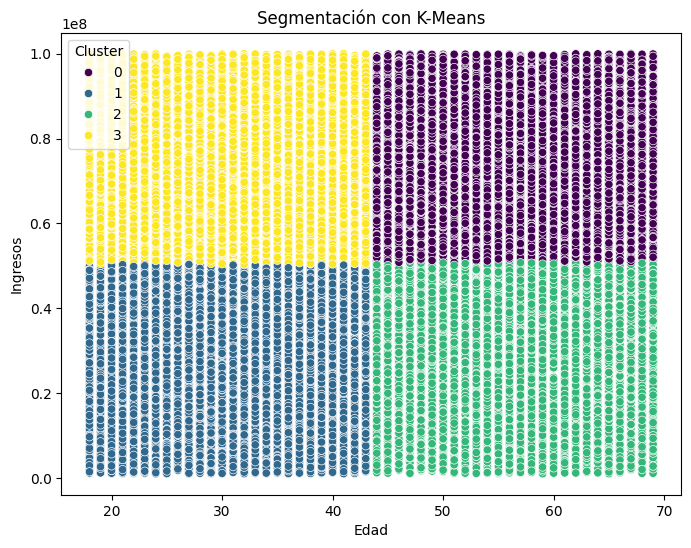

In [83]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['edad'], y=df['ingresos'], hue=df['Cluster'], palette='viridis')
plt.xlabel('Edad')
plt.ylabel('Ingresos')
plt.title('Segmentación con K-Means')
plt.show()

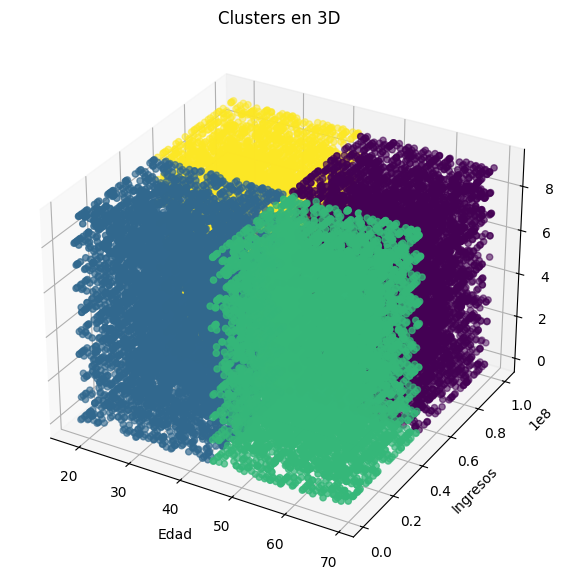

In [84]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['edad'], df['ingresos'], df['ciudad'], c=df['Cluster'], cmap='viridis')

ax.set_xlabel('Edad')
ax.set_ylabel('Ingresos')
ax.set_zlabel('Ciudad')
ax.set_title('Clusters en 3D')

plt.show()


In [85]:
print("Centroides de los clusters:")
print(kmeans.cluster_centers_)

Centroides de los clusters:
[[ 0.87440984  0.87748121]
 [-0.8624071  -0.87025345]
 [ 0.87535826 -0.84898301]
 [-0.85164878  0.86801798]]
